**1. Import Package**

In [ ]:
import pandas as pd
import numpy as np
import tweepy as tp

# Import nltk module
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Import Reguler Expression
import re

# Import textblob
from textblob import TextBlob

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lemazitation
from textblob import Word

# WordCloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**2. Data Understanding**

In [ ]:
# Import Data
df = pd.read_csv('/content/tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [ ]:
df.shape

(14485, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason                9082 non-null   object 
 4   negativereason_confidence     10416 non-null  float64
 5   airline                       14485 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14485 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14485 non-null  int64  
 10  text                          14485 non-null  object 
 11  tweet_coord                   1007 non-null   object 
 12  tweet_created                 14485 non-null  object 
 13  t

Since only the tweet data will be used, a new data frame needs to be created to save memory and improve the effectiveness of the analysis to be performed

In [ ]:
df1 =  df[['text']]
df1.head()

,text
0,@JetBlue's new CEO seeks the right balance to ...
1,@JetBlue is REALLY getting on my nerves !! 😡😡 ...
2,@united yes. We waited in line for almost an h...
3,@united the we got into the gate at IAH on tim...
4,@SouthwestAir its cool that my bags take a bit...
5,@united and don't hope for me having a nicer f...
6,@united I like delays less than you because I'...
7,"@united, link to current status of flights/air..."
8,@SouthwestAir you guys there? Are we on hour 2...
9,@united I tried 2 DM it would not go thru... n...


**3. Pre-Processing**

In [ ]:
# Drop duplicate tweet
g_unique = set()
for item in df1['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    df2 = pd.DataFrame(tweet,columns = ['text'])

**3.a. Lower Casing**

In [ ]:
df2['text'] = df2['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['text'].head()

,text
0,@jetblue flight 1025 jfk to tpa 8:05am on satu...
1,@usairways no one is coming to line. on hold f...
2,@united i6ep18
3,@usairways on the phone over an hour waiting f...
4,@usairways we got our bags today. thanks!


**3.b. Punctuation Removal**

In [ ]:
df2['text'] = df2['text'].str.replace('[^\w\s]','')
df2.head()

,text
0,@jetblue flight 1025 jfk to tpa 8:05am on satu...
1,@usairways no one is coming to line. on hold f...
2,@united i6ep18
3,@usairways on the phone over an hour waiting f...
4,@usairways we got our bags today. thanks!


**3.c. Stopword Removal**

In [ ]:
stop = stopwords.words('english')
df2['text'] = df2['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2['text'].head(10)

,text
0,@jetblue flight 1025 jfk tpa 8:05am saturday! ...
1,@usairways one coming line. hold 4 hours. u he...
2,@united i6ep18
3,@usairways phone hour waiting customer service...
4,@usairways got bags today. thanks!
5,"@jetblue cheated you, i'm sorry. i'll never ag..."
6,"@jetblue physically impossible make airport, f..."
7,"@usairways today,no reason 4 anyone approve me..."
8,@jetblue makes happy. hope empty promises.
9,@southwestair please help get tickets @imagine...


**3.d. Frequents Word Removal**

In [ ]:
freq = pd.Series(' '.join(df2['text']).split()).value_counts()[:10]
freq

,count
@united,2667
flight,2058
@usairways,2050
@southwestair,1804
@jetblue,1560
get,828
cancelled,641
@americanair,540
service,432
i'm,427


**3.e. Rare Words Removal**

In [ ]:
rare_word = pd.Series(' '.join(df2['text']).split()).value_counts()[-10:]
rare_word

,count
#passengerslose,1
@robbogart,1
fib,1
#twitterhug,1
#shesaidrun,1
"swamped,",1
au,1
"prince,",1
on-going,1
2morrw,1


In [ ]:
rare_word = list(rare_word.index)
df2['text'] = df2['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df2['text'].head()

,text
0,1025 jfk tpa 8:05am saturday! one way ticket!
1,one coming line. hold 4 hours. u help provide ...
2,i6ep18
3,phone hour waiting customer got wrong fight in...
4,got bags today. thanks!


**3.f. Spelling Correction**

In [ ]:
#Spelling correction
df2['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

,text
0,1025 of tea 8:am saturday! one way ticket!
1,one coming line. hold 4 hours. u help provide ...
2,i6ep18
3,phone hour waiting customer got wrong fight in...
4,got bags today. thanks!


**3.g. Tokenization**

In [ ]:
TextBlob(df2['text'][1]).words

WordList(['one', 'coming', 'line', 'hold', '4', 'hours', 'u', 'help', 'provide', 'conf', 'code'])

**3.h. Stemming**

In [ ]:
st = PorterStemmer()
df2['text'] = df2['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

**3.f. Lemazitation**

In [ ]:
df2['text'] = df2['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df2['text'].head()

,text
0,miracul fix plane #kudo shoe ever
1,app still say can't dm you...
2,alist pref good direct atl alway wifiless. 1701.
3,"book aa award usair metal, space open aa metal..."
4,"flightled, can't go home tomorrow. could use d..."


**4.Data exploration**

In [ ]:
cs = df['airline_sentiment'].value_counts()
cs

,count
airline_sentiment,
negative,9082
neutral,3069
positive,2334


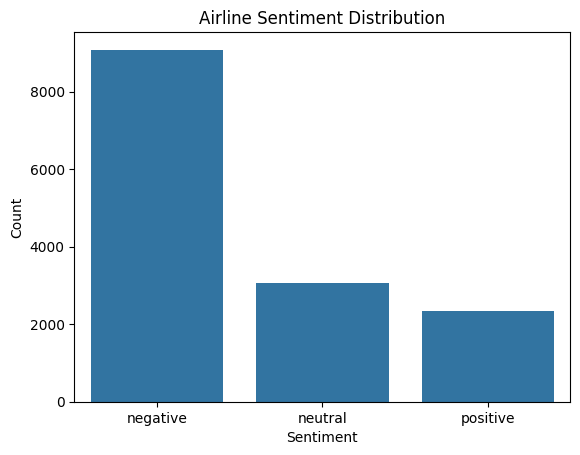

In [ ]:
cs = df['airline_sentiment'].value_counts()
cs
sns.barplot(x=cs.index, y=cs.values)
# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Airline Sentiment Distribution')

# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

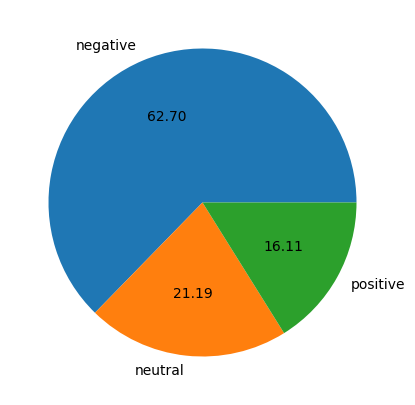

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(cs, labels=cs.index, autopct='%.2f')
plt.show

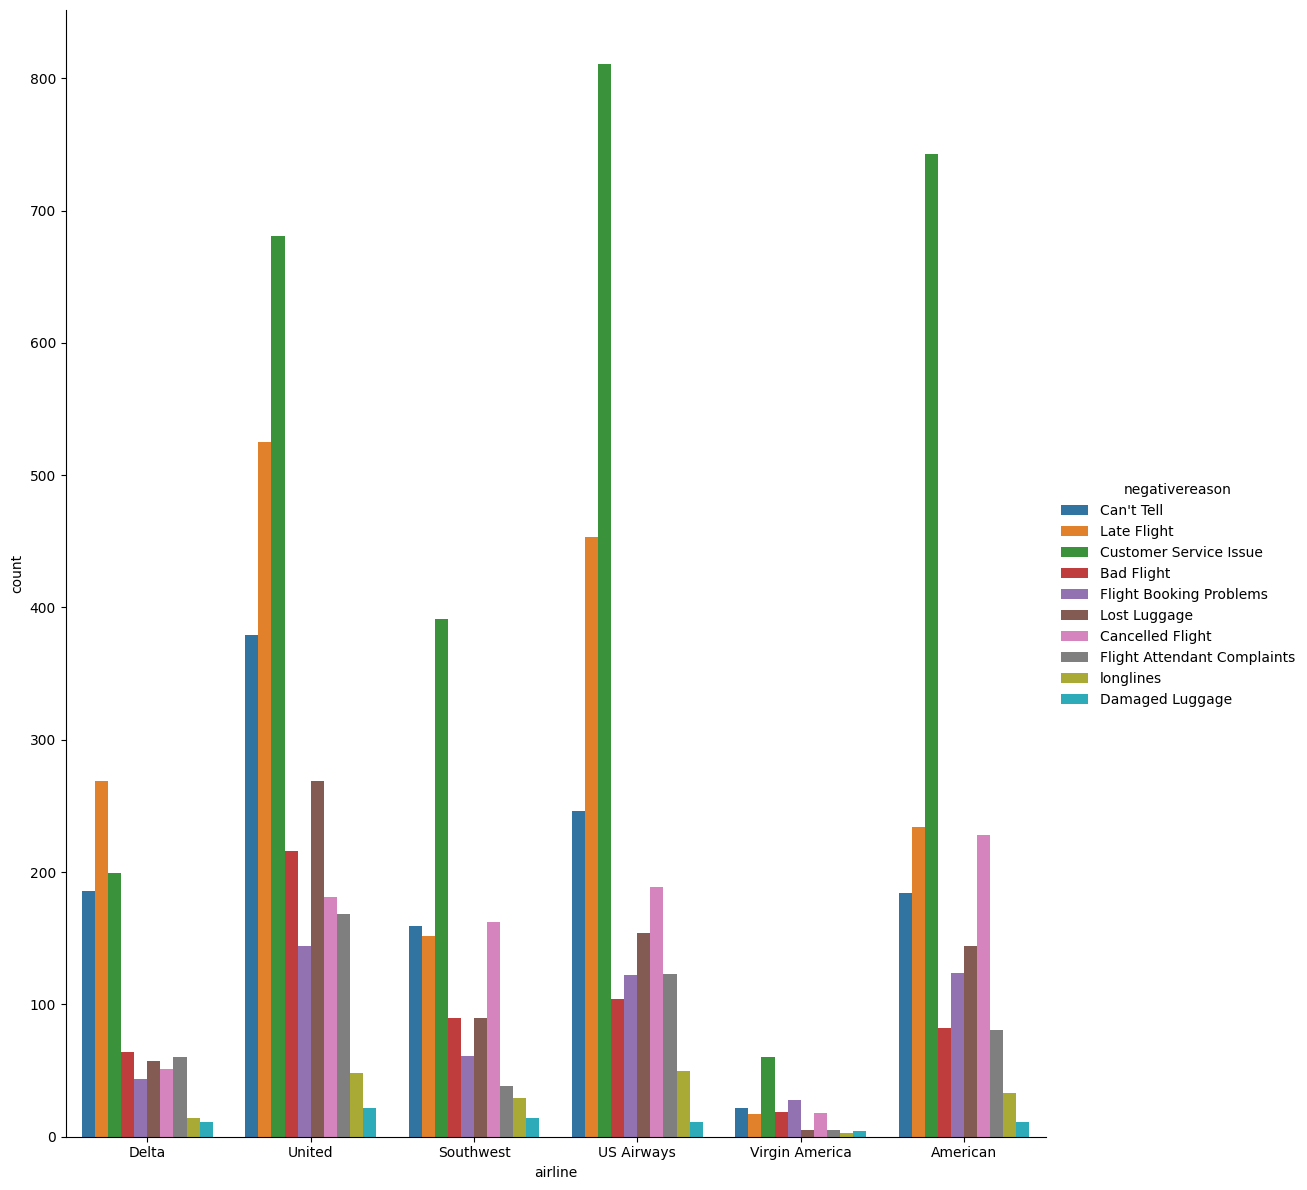

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replacing factorplot with catplot
sns.catplot(x='airline', data=df, kind='count', hue='negativereason', height=12, aspect=.9)

# Showing the plot
plt.show()

**5. Sentiment Analysis**

In [ ]:
wordc = "".join(df2.text.values)

In [ ]:
#make a wordcloud
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

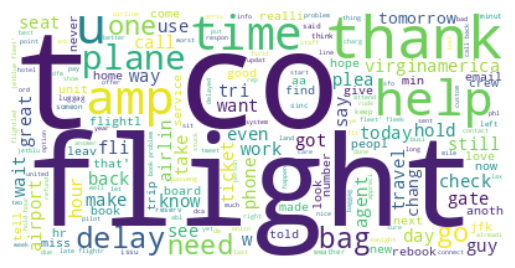

In [ ]:
create_word_cloud(wordc)

**WordCloud Sentiment Positive, Negative, Neutral**

In [ ]:
# positive = df.loc[df['airline_sentiment'] == "positive"]
negative  = df.loc[df['airline_sentiment'] == "negative"]
# neutral  = df.loc[df['airline_sentiment'] == "neutral"]

In [ ]:
# positive = "".join(positive.positivereason.values)
negative = "".join(negative.negativereason.values)
# neutral = "".join(neutral.neutralreason.values)

In [ ]:
#make a wordcloud
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

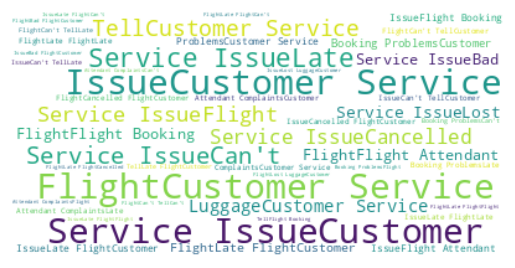

In [ ]:
create_word_cloud(negative)